## Realized Volatility: What It Is and What It’s Not

#### Common Misconception: 

Realized volatility is often mistakenly seen as a predictor of future volatility. However, while many theoretical models (e.g., ARMA, GARCH) attempt to forecast volatility, they have limited practical use.

#### Practical Relevance: 

Despite its limitations as a predictor, realized volatility is crucial for trading and strategy decisions, such as determining if volatility is rich or cheap and understanding the current volatility regime.

### Factors Affecting Realized Volatility Measurement

#### A. Length and Frequency of Measurement

#### Importance of Selection: 

The length and frequency of the realized volatility measurement significantly impact its accuracy. For instance, when analyzing 1-month volatility, deciding whether to use a 10-day, 20-day, or longer lookback window is non-trivial. Similarly, the sampling frequency (daily, hourly, etc.) influences the results.

Example: The predictability of short-term (overnight) realized volatility is higher than that of longer-term tenors, demonstrating the reduced utility of using realized volatility for long-term predictions

#### B. Sampling Frequency and Tenor Length

Short-Term vs. Long-Term: Short-term realized volatility is more sensitive to sampling frequency due to fewer data points, whereas long-term measurements show diminishing sensitivity to higher frequency data.
Illustration: Using USD/JPY data as an example, the difference between daily and high-frequency sampling diminishes as the lookback period increases.

### Methods of Measuring Realized Volatility

#### A. Close-Close Volatility:

Description: The most common method, using fixed time intervals (e.g., daily, hourly).
Limitations: Assumes returns are independent and identically distributed (i.i.d.) and that trading occurs in discrete time, both of which are not always true in practice.

#### B. Parkinson Volatility:

Description: Uses high/low prices, making it a better estimator than close-close volatility.
Limitations: Doesn’t account for price jumps (e.g., overnight or weekend gaps).

#### C. Garman-Klass Volatility:

Description: Incorporates open/close prices, addressing some intraday dynamics.
Limitations: Still underestimates realized volatility and doesn’t handle price jumps well.

##### D. GKYZ Volatility (Yang-Zhang Estimator):

Description: Extends Garman-Klass by handling intraday dynamics and overnight jumps.
Advantages: Considered the most efficient estimator for realized volatility.

### Practical Applications of Realized Volatility

A. Implied Volatility Analysis
Use Case: Comparing realized volatility with implied volatility to determine if the latter is rich or cheap.
Method: Price implied volatility by using historical realized volatility as a base and adjusting for expected events.

B. Mean-Reversion/Trend Dynamics (Variance Ratio)
Use Case: Detecting mean-reversion or trend dynamics in an asset’s price movement.
Method: Compare high-frequency realized variance with daily close-close variance to identify short-term dynamics not visible in long-term charts.

C. Regime Analysis
Use Case: Analyzing volatility under different market regimes.
Method: Use past realized volatility during similar regimes to estimate potential future volatility, especially around events like FOMC meetings.

In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [9]:
# Download S&P 500 historical data
ticker = '^GSPC'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Calculate daily returns
data['Return'] = data['Adj Close'].pct_change()

# Calculate realized volatility (using a rolling window of 1 day)
data['Realized Vol'] = data['Return'].rolling(window=2).std()

# Lag the realized volatility by one day to compare with the next day's realized vol
data['Previous Day Realized Vol'] = data['Realized Vol'].shift(1)

# Drop NaN values
data = data.dropna()

[*********************100%***********************]  1 of 1 completed


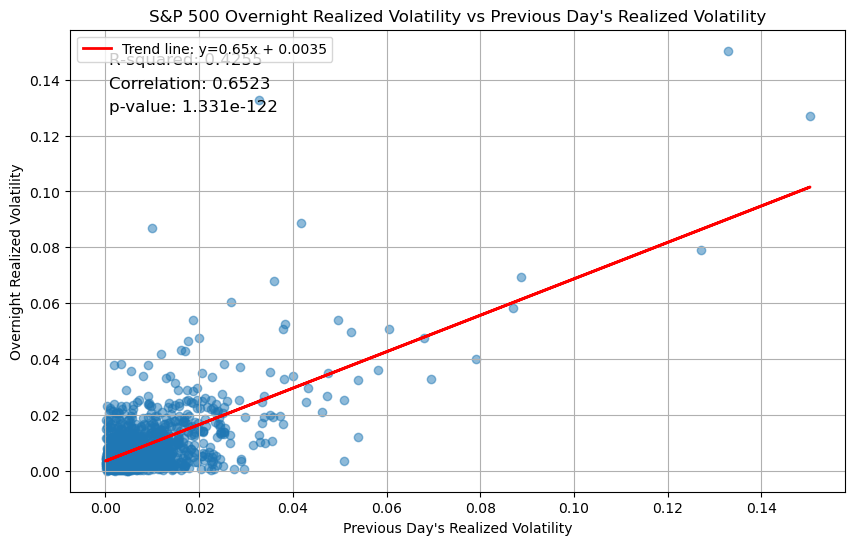

In [10]:
# Perform linear regression to get statistical numbers
slope, intercept, r_value, p_value, std_err = linregress(data['Previous Day Realized Vol'], data['Realized Vol'])

# Plot the realized vol against the previous day's realized vol
plt.figure(figsize=(10, 6))
plt.scatter(data['Previous Day Realized Vol'], data['Realized Vol'], alpha=0.5)

# Plot the trend line
trend_line = slope * data['Previous Day Realized Vol'] + intercept
plt.plot(data['Previous Day Realized Vol'], trend_line, color='red', linewidth=2, label=f'Trend line: y={slope:.2f}x + {intercept:.4f}')

# Add statistical numbers to the plot
plt.text(0.05, 0.95, f'R-squared: {r_value**2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Correlation: {r_value:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'p-value: {p_value:.4g}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add title and labels
plt.title("S&P 500 Overnight Realized Volatility vs Previous Day's Realized Volatility")
plt.xlabel("Previous Day's Realized Volatility")
plt.ylabel("Overnight Realized Volatility")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
# Calculate 2-week (10 trading days) realized volatility
data['2-Week Realized Vol'] = data['Return'].rolling(window=10).std()

# Lag the 2-week realized volatility by 2 weeks (10 trading days)
data['2-Week Lagged Vol'] = data['2-Week Realized Vol'].shift(10)

# Drop NaN values
data = data.dropna()

C:\Users\tribh\AppData\Local\Temp\ipykernel_11480\804001174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['2-Week Realized Vol'] = data['Return'].rolling(window=10).std()
C:\Users\tribh\AppData\Local\Temp\ipykernel_11480\804001174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['2-Week Lagged Vol'] = data['2-Week Realized Vol'].shift(10)


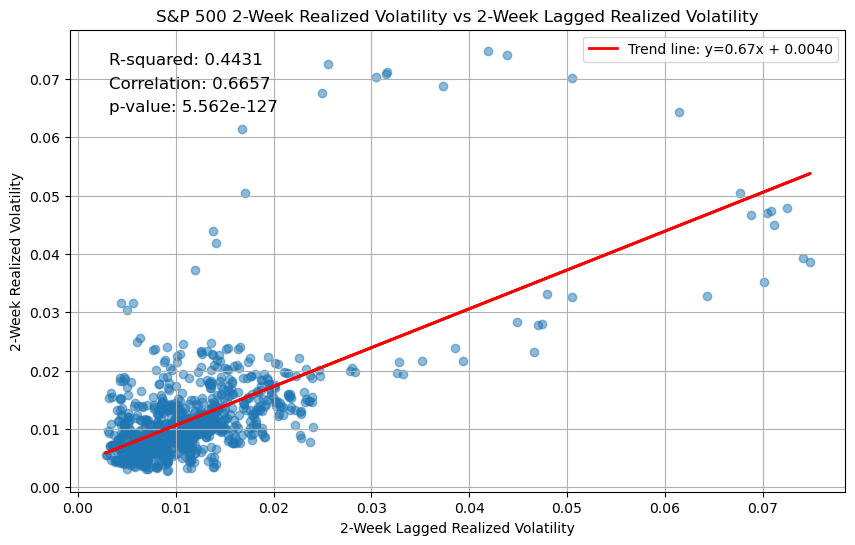

In [12]:
# Perform linear regression to get statistical numbers
slope, intercept, r_value, p_value, std_err = linregress(data['2-Week Lagged Vol'], data['2-Week Realized Vol'])

# Plot the 2-week realized vol against the 2-week lagged vol
plt.figure(figsize=(10, 6))
plt.scatter(data['2-Week Lagged Vol'], data['2-Week Realized Vol'], alpha=0.5)

# Plot the trend line
trend_line = slope * data['2-Week Lagged Vol'] + intercept
plt.plot(data['2-Week Lagged Vol'], trend_line, color='red', linewidth=2, label=f'Trend line: y={slope:.2f}x + {intercept:.4f}')

# Add statistical numbers to the plot
plt.text(0.05, 0.95, f'R-squared: {r_value**2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Correlation: {r_value:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'p-value: {p_value:.4g}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add title and labels
plt.title("S&P 500 2-Week Realized Volatility vs 2-Week Lagged Realized Volatility")
plt.xlabel("2-Week Lagged Realized Volatility")
plt.ylabel("2-Week Realized Volatility")
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# Garman-Klass Volatility Estimator (High-Frequency Intraday Variance)
data['Garman-Klass Var'] = 0.5 * (np.log(data['High'] / data['Low']) ** 2) - \
                           (2 * np.log(2) - 1) * (np.log(data['Close'] / data['Open']) ** 2)

# Daily Close-to-Close Variance (Standard Realized Variance)
data['Close-Close Var'] = data['Return'] ** 2

# Rolling sum of variances (10-day window)
data['Rolling Garman-Klass Var'] = data['Garman-Klass Var'].rolling(window=10).sum()
data['Rolling Close-Close Var'] = data['Close-Close Var'].rolling(window=10).sum()

# Calculate the Variance Ratio
data['Variance Ratio'] = data['Rolling Garman-Klass Var'] / data['Rolling Close-Close Var']

# Drop NaN values
data = data.dropna()

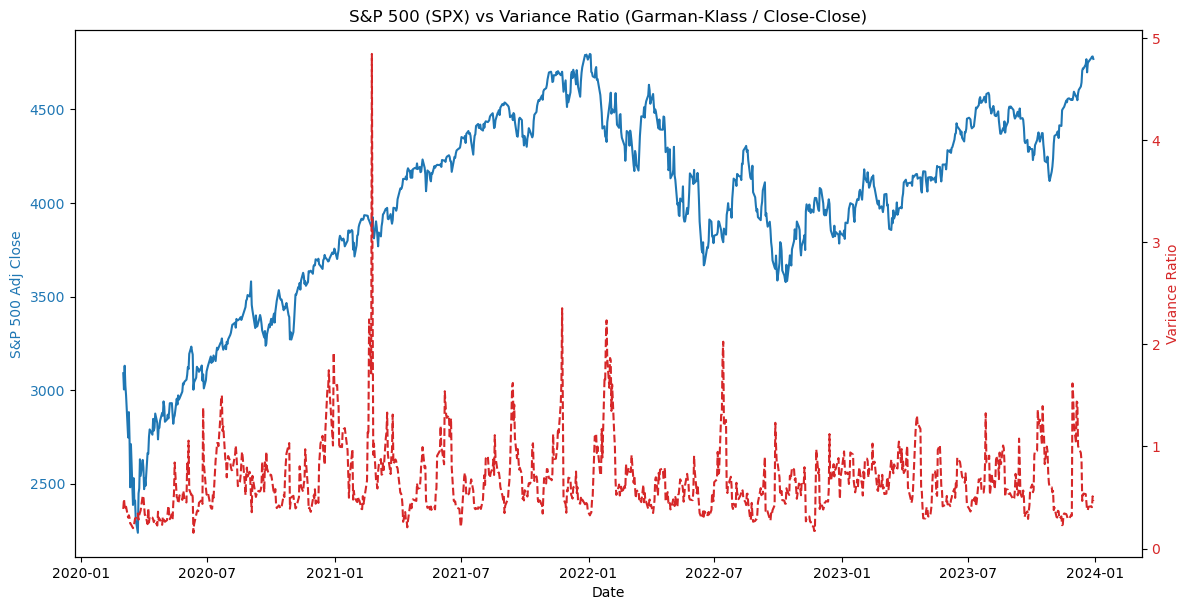

In [18]:
# Plot SPX (Adj Close) and Variance Ratio
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Adj Close', color='tab:blue')
ax1.plot(data.index, data['Adj Close'], color='tab:blue', label='S&P 500 Adj Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Variance Ratio', color='tab:red')
ax2.plot(data.index, data['Variance Ratio'], color='tab:red', label='Variance Ratio', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title("S&P 500 (SPX) vs Variance Ratio (Garman-Klass / Close-Close)")
plt.show()